# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Assignment - 3 4/20/2024

## Read the CSV file
To read a CSV file named emotion_sentimen_dataset.csv into a DataFrame using the pandas library

In [25]:
import pandas as pd
df = pd.read_csv(r"emotion_sentimen_dataset.csv")
df.head(10)


,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love
6,6,when a friend of mine keeps telling me morbid ...,neutral
7,7,i finally fell asleep feeling angry useless an...,worry
8,8,i feel a bit annoyed and antsy in a good way,neutral
9,9,i feel like i ve regained another vital part o...,neutral


## Read the stop words
This block of Python code uses the nltk library to handle natural language processing tasks.This code is used in the preprocessing phase of text analysis to clean and prepare text data for further operations.

In [26]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'when', 'on', 'why', 'themselves', 'each', 'just', 'further', 'me', "wouldn't", 'the', 'does', 'hers', 'once', 'aren', 'but', 'which', 'a', 'ma', 'weren', "weren't", 'won', 'where', 'our', 'who', "won't", 'myself', 'ain', 'shan', 'through', 'm', 'now', 'mustn', 'y', 'hadn', 'am', 'whom', 're', 'under', 'himself', 'some', 'nor', 'been', 'theirs', 'yourself', 'how', 'for', 'can', 'most', 'up', 'he', "didn't", 'were', "you'll", 'while', "aren't", 'don', 'have', 'own', "needn't", 'so', 'haven', 'isn', "shan't", 'wasn', "haven't", 'between', 'yourselves', 'what', 'after', 'few', "wasn't", "it's", 'll', 'such', 'into', 'both', 'their', 'do', 'herself', 'at', 'again', 'and', "couldn't", "she's", 'ours', 'has', 'during', 'are', 'too', 'if', "don't", 'those', 'i', 'any', 'these', 'needn', 'was', 'being', 'over', 'above', 'in', "mightn't", 'before', "hasn't", 'down', 'then', 'she', 'having', "you've", 'because', 'yours', 'its', "you'd", 'my', 'wouldn', 'very', 'of', 'them', 'be', 'itself', 'him

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Prerocessing pipeline
This code is designed to preprocess textual data within a pandas DataFrame.This code is an example of a text preprocessing pipeline in natural language processing tasks, where the goal is to clean and standardize text data before analysis or modeling.

In [27]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [28]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [29]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [30]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## Count the tokens from the given dataset
It performs a frequency analysis of tokens in a pandas DataFrame and organizes the results into another DataFrame sorted by frequency.

In [31]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
feel,583925
feeling,270334
like,148936
im,124267
really,52047
know,47847
time,42878
get,39434
little,38712


## Code to print the word cloud

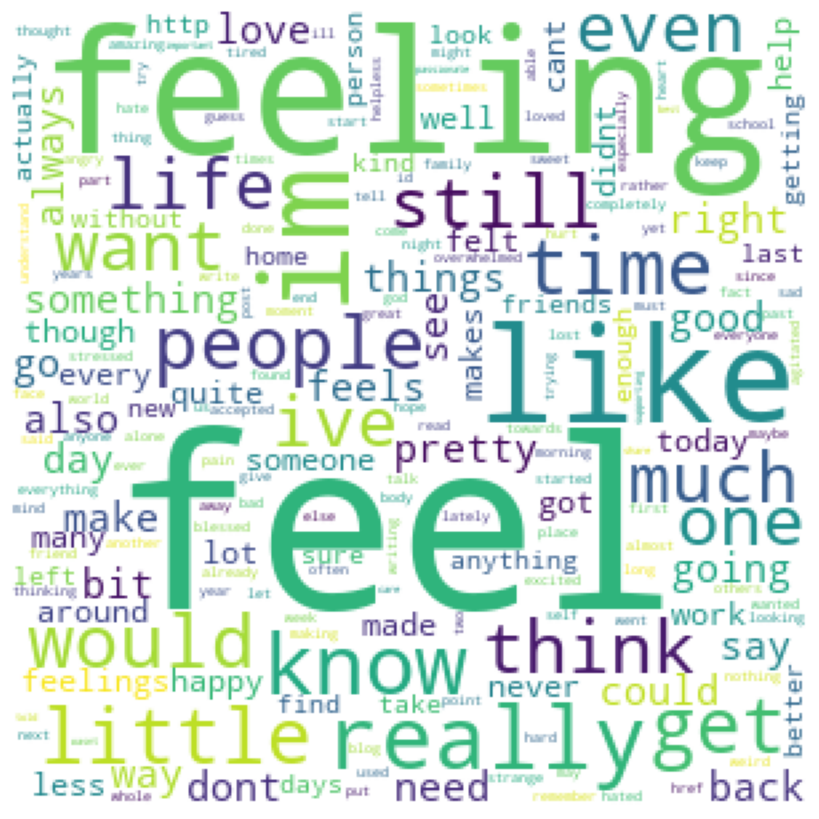

In [32]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## TFIDF
Following are the steps to perform TFIDF for comparision

In [33]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [34]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head(15)


,freq,tfidf
token,,
feel,583925,301567.748242
feeling,270334,340995.896774
like,148936,284788.584389
im,124267,265906.628797
really,52047,153729.218731
know,47847,144799.299192
time,42878,134451.567146
get,39434,126815.461901
little,38712,124732.471533


## To perform word cloud for tfidf data

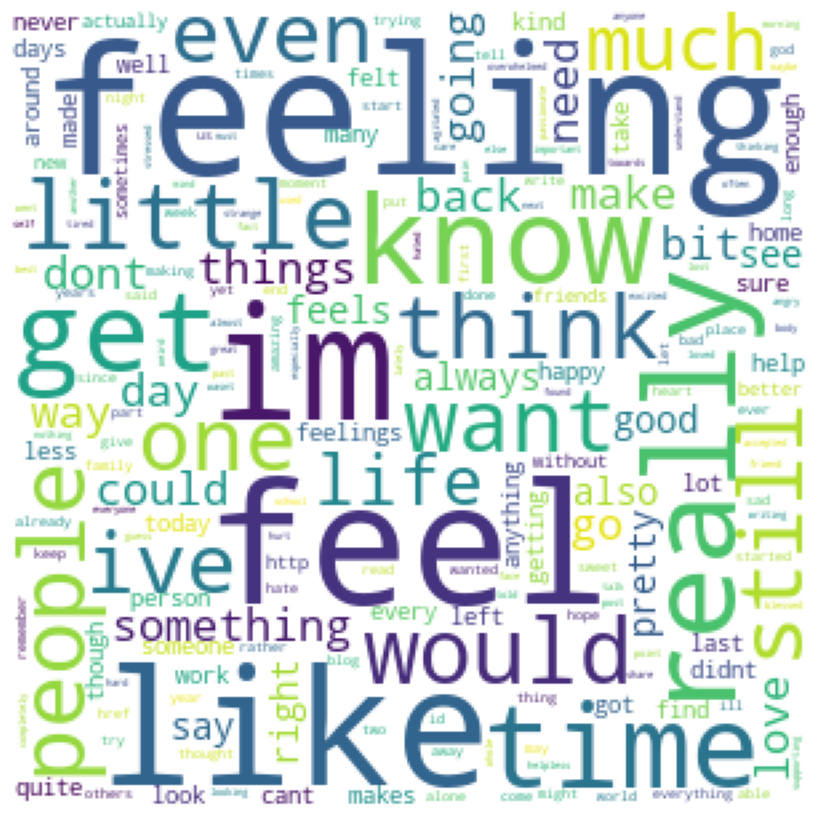

In [35]:
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## Function to count the keywords

In [36]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


## Function to group by emotion

In [37]:
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

## perform Heatmap between emotions and keywords

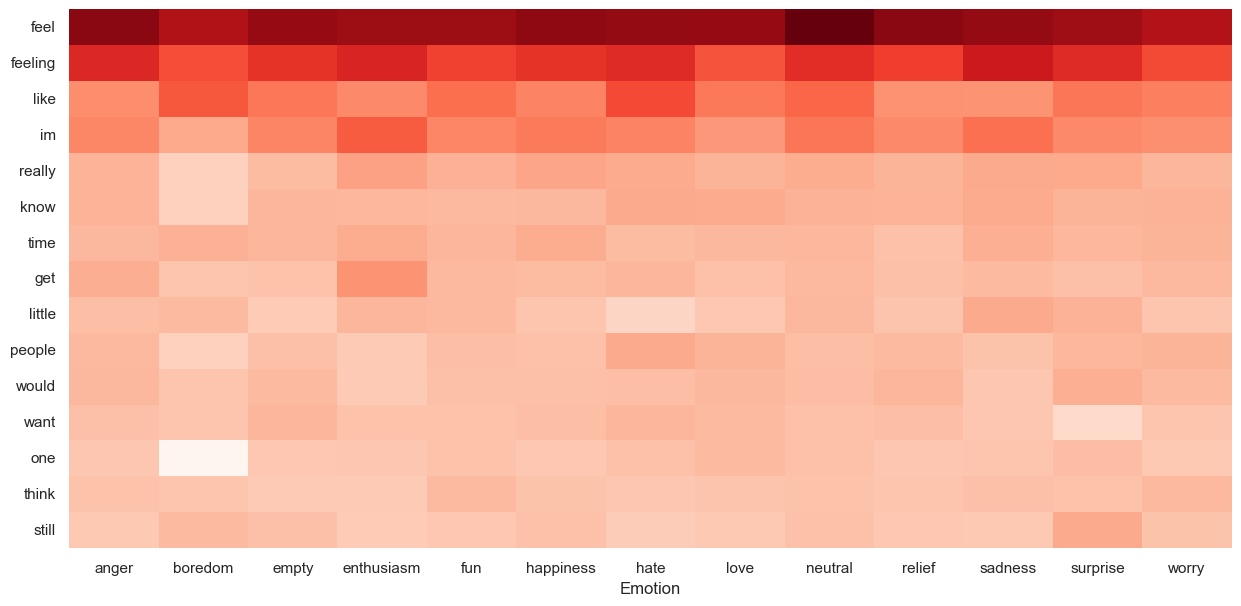

In [38]:
import seaborn as sns
keywords = ['feel','feeling','like','im','really','know','time','get','little','people','would','want','one','think','still']  
freq_df = count_keywords_by(df, by='Emotion', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Emotion')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)